## Machine Learning I
### Group Project: Nata Visionaries
#### Group Members:
- Afonso Fernandes / 20241710
- Henrique Santos / 20241752
- Laura Lisboa / 20241783
- Lourenço Lima / 20241711
- Tiago Carvalho / 20241728  
## Introduction
In the quest for the perfect Pastel de Nata, Portugal’s iconic custard tart, tradition meets data science. The Nata Visionaries, a group of pastry enthusiasts from Lisbon and Porto, collected bakery data to uncover what defines an exceptional tart.  
To minimize waste and preserve quality, they’ve tasked our team with developing a machine learning model that predicts whether a tart is “OK” (approved) or “KO” (rejected) based on its recipe and production parameters.  

This project, developed for the Machine Learning I course, aims to combine exploratory data analysis, feature engineering, and predictive modeling to identify the factors that most influence tart quality.  
### Project Objectives
The main goal is to develop a classification model capable of predicting tart quality based on the available recipe and baking data.  
The project aims to :
- Understand and explore the dataset provided by Nata Visionaries
- Clean and preprocess the data to ensure quality and consistency
- Engineer relevant features that capture meaningful relationships between variables
- Experiment with multiple machine learning algorithms to identify the most accurate predictive model
- Evaluate model performance using Accuracy as the main metric
- Deploy the best-performing model to make predictions for unseen data (predict.csv) and submit results to a private Kaggle competition.
### Methodological Framework
The workflow can be summarized as:
- Business Understanding: define the project’s goals and the metric used to evaluate success
- Data Understanding: explore the dataset to identify patterns, trends, and potential issues
- Data Preparation: clean, encode, and organize the data to make it suitable for modeling
- Modeling: experiment with different algorithms and adjust their parameters to improve performance
- Evaluation: compare model results and select the one that achieves the best accuracy
- Deployment: apply the final model to the test dataset and submit the predictions to Kaggle

#### Import essential libraries used for data exploration and basic modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
import seaborn as sns

We load the main dataset (learn.csv), which contains both the input features and the target variable (quality_class), where the model will learn and find patterns.  
Displaying its shape allows us to see how many observations (rows) and variables (columns) we have.

In [2]:
dataset_learn = pd.read_csv('Nata_Files/learn.csv', sep = ',', index_col = 0)
display(dataset_learn.shape)
dataset_learn

(5200, 17)

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,NaN,Lisboa,306.0,NaN,245.0,41.73,11.6,4.0,KO
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,NaN,Porto,121.0,NaN,186.0,75.10,20.3,7.5,OK
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,NaN,Lisboa,357.0,Pastel de Nata,186.0,46.41,73.3,4.2,OK
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,NaN,Lisboa,202.0,Pastel de nata,218.0,56.52,80.1,6.0,KO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,60.0,18.0,35.0,96.0,72.0,11.0,215.0,3.3,NaN,Lisboa,222.0,NaN,177.0,34.42,58.9,5.7,OK
5197,61.0,25.0,40.0,96.4,99.0,9.0,367.0,3.2,NaN,Lisboa,366.0,Pastel De Nata,224.0,46.18,141.4,6.5,KO
5198,69.0,18.0,36.0,97.7,90.0,11.0,206.0,3.6,NaN,Lisboa,203.0,Pastel de nata,158.0,28.46,10.0,6.0,OK


In [3]:
dataset_learn.sort_values(by = 'origin', ascending = True)

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
4386,40.0,21.0,32.0,97.7,73.0,12.0,222.0,3.4,NaN,Lisboa,204.0,Pastel Nata,217.0,43.46,20.0,5.4,KO
4904,67.0,21.0,33.0,96.7,40.0,11.0,172.0,3.1,NaN,Lisboa,174.0,NaN,198.0,29.02,69.9,5.5,OK
1432,58.0,19.0,34.0,98.7,151.0,9.0,301.0,3.4,NaN,Lisboa,296.0,Pastel de Nata,216.0,56.21,133.1,3.4,OK
601,45.0,18.0,32.0,98.5,86.0,9.0,224.0,3.2,NaN,Lisboa,241.0,Pastel De Nata,207.0,46.06,83.5,3.4,KO
2258,68.0,21.0,28.0,96.0,146.0,9.0,257.0,3.0,NaN,Lisboa,265.0,NaN,231.0,56.12,117.2,3.0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,40.0,30.0,25.0,99.1,70.0,10.0,116.0,3.2,NaN,NaN,119.0,Pastel de nata,200.0,80.41,25.4,5.7,KO
5076,72.0,24.0,24.0,100.0,102.0,10.0,324.0,3.4,NaN,NaN,317.0,NaN,190.0,43.92,119.3,4.1,OK
5102,74.0,17.0,56.0,98.3,129.0,9.0,282.0,3.0,NaN,NaN,279.0,Pastel De Nata,197.0,55.05,64.4,4.3,OK


In [4]:
dataset_learn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 1 to 5200
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ambient_humidity   5182 non-null   float64
 1   baking_duration    5199 non-null   float64
 2   cooling_period     5199 non-null   float64
 3   cream_fat_content  5176 non-null   float64
 4   egg_temperature    5176 non-null   float64
 5   egg_yolk_count     5176 non-null   float64
 6   final_temperature  5175 non-null   float64
 7   lemon_zest_ph      5174 non-null   float64
 8   notes_baker        0 non-null      float64
 9   origin             5039 non-null   object 
 10  oven_temperature   5179 non-null   float64
 11  pastry_type        3411 non-null   object 
 12  preheating_time    5181 non-null   float64
 13  salt_ratio         5187 non-null   float64
 14  sugar_content      5178 non-null   float64
 15  vanilla_extract    5182 non-null   float64
 16  quality_class      5199 non-n

#### Separating Numeric and Categorical Columns

In [5]:
cols_number = dataset_learn.select_dtypes(include='number')
cols_categorical = dataset_learn.select_dtypes(include=['object','category'])
display(cols_categorical)
display(cols_number)

,origin,pastry_type,quality_class
id,,,
1,Lisboa,Pastel Nata,KO
2,Lisboa,NaN,KO
3,Porto,NaN,OK
4,Lisboa,Pastel de Nata,OK
5,Lisboa,Pastel de nata,KO
...,...,...,...
5196,Lisboa,NaN,OK
5197,Lisboa,Pastel De Nata,KO
5198,Lisboa,Pastel de nata,OK


,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract
id,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,NaN,207.0,42.74,22.8,5.7
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,NaN,306.0,245.0,41.73,11.6,4.0
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,NaN,121.0,186.0,75.10,20.3,7.5
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,NaN,357.0,186.0,46.41,73.3,4.2
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,NaN,202.0,218.0,56.52,80.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,60.0,18.0,35.0,96.0,72.0,11.0,215.0,3.3,NaN,222.0,177.0,34.42,58.9,5.7
5197,61.0,25.0,40.0,96.4,99.0,9.0,367.0,3.2,NaN,366.0,224.0,46.18,141.4,6.5
5198,69.0,18.0,36.0,97.7,90.0,11.0,206.0,3.6,NaN,203.0,158.0,28.46,10.0,6.0


We separate numeric and categorical features to facilitate targeted exploration and visualization.  
In this dataset, most features are numeric, except origin, pastry_type  (both categorical) and the target variable quality_class. 

#### Descriptive Statistics

In [6]:
display(cols_categorical.describe().T)
display(cols_number.describe().T)

,count,unique,top,freq
origin,5039,10,Lisboa,3486
pastry_type,3411,4,Pastel Nata,879
quality_class,5199,2,OK,3302


,count,mean,std,min,25%,50%,75%,max
ambient_humidity,5182.0,59.980316,11.616151,40.00,50.00,60.00,70.000,80.00
baking_duration,5199.0,26.979804,8.320079,14.00,21.00,25.00,30.000,89.00
cooling_period,5199.0,31.817850,14.427143,0.00,25.00,31.00,39.000,105.00
cream_fat_content,5176.0,98.413060,1.997350,91.90,97.10,98.40,99.800,107.30
egg_temperature,5176.0,70.812403,35.439831,12.00,44.00,67.00,92.000,575.00
egg_yolk_count,5176.0,10.498068,1.257709,8.00,10.00,10.00,11.000,15.00
final_temperature,5175.0,223.577198,85.258779,31.00,164.00,226.00,284.000,722.00
lemon_zest_ph,5174.0,3.218902,0.165909,2.70,3.10,3.20,3.300,4.00
notes_baker,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oven_temperature,5179.0,223.541031,84.482034,58.00,166.00,227.00,283.000,713.00


Summary statistics help identify differences in scale, variability, and potential outliers in numeric columns.  
For example, we can spot if some features, like oven_temperature, have much higher variance than others.
For categorical data, we check the unique value counts and most frequent categories.  

- Numeric Columns: The output shows the mean, standard deviation (std), min, max, and quartiles. This helps us identify:
    - Scale Differences: Features are on wildly different scales (e.g., `egg_yolk_count` and `sugar_content`), highlighting the future need for feature scaling (normalization/standardization).
    - Variability: Features with a high `std`, like `oven_temperature`, show greater variation, which may be crucial to class separation.
    - Potential Outliers: A large discrepancy between the `max` value and the 75th percentile suggests possible outliers.  
- Categorical/Object Columns: The output shows the unique categories, most frequent category (`top`), and its frequency (`freq`). This helps us check for class balance in the target variable (`quality_class`).

### Histograms

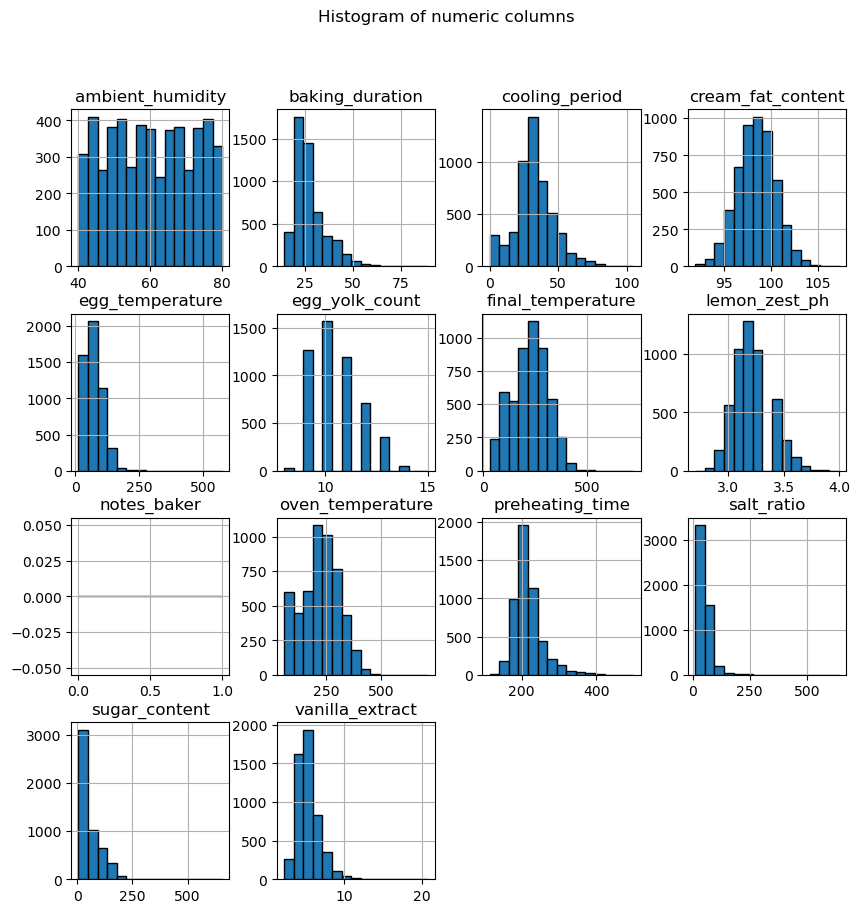

In [7]:
cols_number.hist(bins=15, figsize=(10, 10), edgecolor='black')
plt.suptitle('Histogram of numeric columns')
plt.show()

Key Observations and Analysis:
- Skewness: We look for variables that are not symmetrically distributed, skewed left or right.  
    - Examples of right skewed are `vanilla_extract` and `salt_ratio`, this strong skewness suggests that these variables will likely benefit from a logarithmic transformation during preprocessing. This transformation compresses the high end of the scale, making the distribution more symmetrical and improving the performance of distance-based and linear models.  
- Generally Normal/Uniform Distributions, for example `ambient_humidity` and `cooling_period` show distributions that are relatively symmetric or uniform. These variables are generally well-behaved and may only require standard scaling without needing complex non-linear transformations.

#### Outlier Detection and Scale Comparison, boxplots

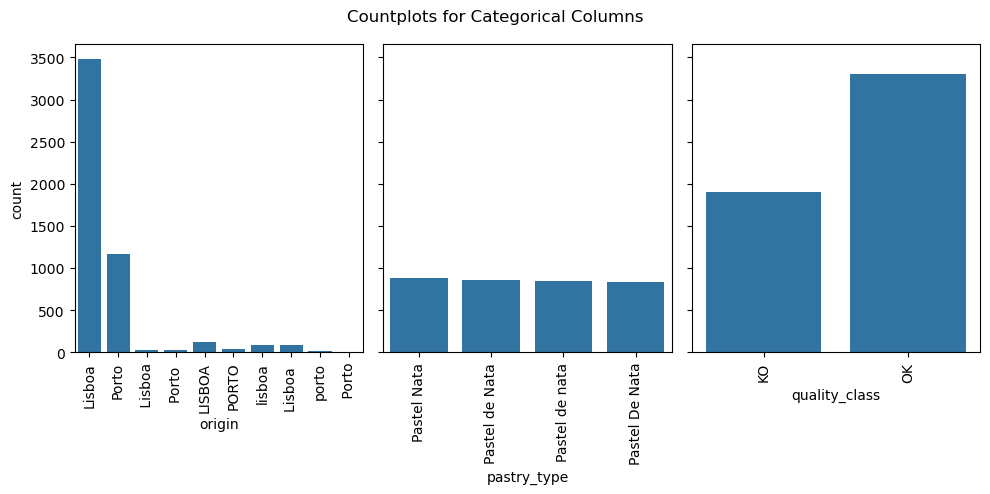

In [8]:
fig,axes = plt.subplots(1,3, figsize=(10,5), tight_layout=True, sharey = True)

sns.countplot(data=cols_categorical, x='origin', ax=axes[0])
sns.countplot(data=cols_categorical, x='pastry_type', ax=axes[1])
sns.countplot(data=cols_categorical, x='quality_class', ax=axes[2])
plt.suptitle('Countplots for Categorical Columns')
#i want to fix the x axis labels overlapping
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

The boxplots visualize the five-number summary (minimum, Q1, median, Q3, maximum) and potential outliers for every numeric feature.  
Key observations:  
- The use of plt.yscale('log') was necessary because features like `egg_temperature` and `sugar_content` operate on a vastly different magnitude scale than features like `cream_fat_content`. The log scale effectively compresses the y-axis, allowing us to visually compare the relative spread and quartiles of all variables simultaneously.
- Median and IQR:
    - Low Variability, features like `cream_fat_content` and `lemon_zest_ph` have very small boxes (small IQR), indicating that the middle 50% of the data is tightly clustered.
    - High Variability, `sugar_content` has relatively a large boxe, indicating a wider spread in his central values.
- Outlier presence:
    - Almost every feature displays a significant number of data points plotted individually above or below the whiskers.
    - There are some features that have extreme high outliers, like `cooling_period` and `sugar_content`, these values must be carefully handled in the preprocessing stage to mitigate their disproportionate influence on distance-based models.

The resulting bar chart  mixes all the categories from different columns, `origin`, `quality_class` and `pastry_type`, onto a single axis.

In [11]:
def origin_summary(df, col='origin'):
    s = df[col]

    # Basic info dictionary
    info = {
        "total_rows": len(df),
        "missing": int(s.isna().sum()),
        "unique_nonmissing": int(s.nunique(dropna=True))
    }

    # Value counts (including NaN)
    vc = s.value_counts(dropna=False)

    # Summary DataFrame with count and percent
    summary = pd.DataFrame({
        "count": vc,
        "percent": (vc / len(df) * 100).round(2)
    })

    return info, summary


# Example usage
info, summary = origin_summary(dataset_learn, 'origin')
print('Summary info:', info)
display(summary)


Summary info: {'total_rows': 5200, 'missing': 161, 'unique_nonmissing': 10}


,count,percent
origin,,
Lisboa,3486,67.04
Porto,1167,22.44
NaN,161,3.10
LISBOA,119,2.29
Lisboa,88,1.69
lisboa,83,1.60
PORTO,33,0.63
Porto,25,0.48
Lisboa,20,0.38


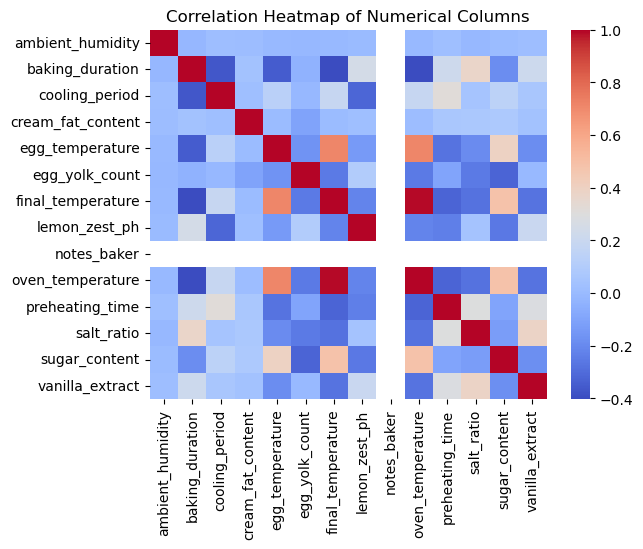

In [12]:
sns.heatmap(cols_number.corr(), cmap='coolwarm') # heatmap only works with numerical data
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

We generate a Correlation Heatmap to visualize the Pearson correlation coefficients among all numeric variables. This matrix is essential for identifying highly related features, which can impact the stability and interpretability of certain machine learning models.

The color intensity and value (ranging from -1.0 to +1.0) indicate the strength and direction of the linear relationship:
- Near +1.0 (Dark Red): Strong positive correlation, as one feature increases, the other also increases.
- Near -1.0 (Dark Blue): Strong negative correlation, as one feature increases, the other decreases.
- Near 0.0 (Pale/White): Weak or no linear correlation.

##### Key Insights:

- Strong Multicollinearity:
    - Features that are highly correlated carry redundant information. Keeping both in a linear model can lead to multicollinearity, which causes model instability and makes it difficult to determine the true individual impact of each variable. These highly correlated pairs are strong candidates for feature selection or dimensionality reduction.

- Weak or No Correlation:
    - Most features often show low correlation with other features. These features are largely independent and provide unique information to the model, making them valuable inputs.
    
This heatmap provides the final piece of evidence needed to prioritize which features must be addressed during the upcoming Preprocessing and Feature Engineering steps.

**As scatterplots are pairwise, we would have a lot of scatterplots for all the pair of features that we have in this dataset, which can become overwhelming and hard do interpret. 
So, we have decided not to plot scatterplots.**